In [27]:
%matplotlib inline
import networkx as nx
#import pygraphviz
import pyparsing
import numpy as np
import matplotlib.pylab as plt

from IPython.display import Math

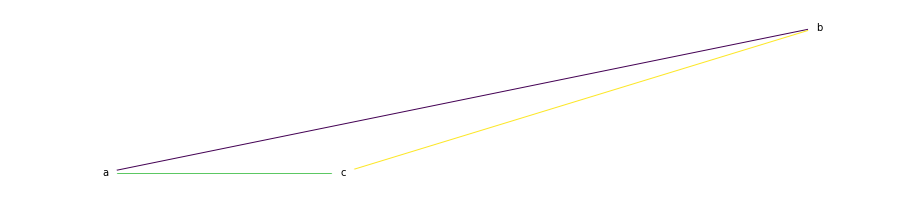

In [37]:
A = np.array([[0,1,1],[0,0,1],[1,0,0]])
G = nx.Graph(A)

labels = {0: "a", 1:"b", 2:"c"}
pos = [(0,0),(3,1),(1,0)]
plt.figure(figsize=(12,2.5))
nx.draw(G, pos, cmap='jet', edge_color=[0.1,0.7,0.9], node_color="white", node_size=500, labels=labels, font_size=10, arrows=True)
#nx.draw(G, pos, node_color="white", node_size=500, arrows=False)
#nx.draw_graphviz(G,node_size=500, labels=labels, font_size=24, arrows=True)
plt.show()

#nx.draw_networkx()

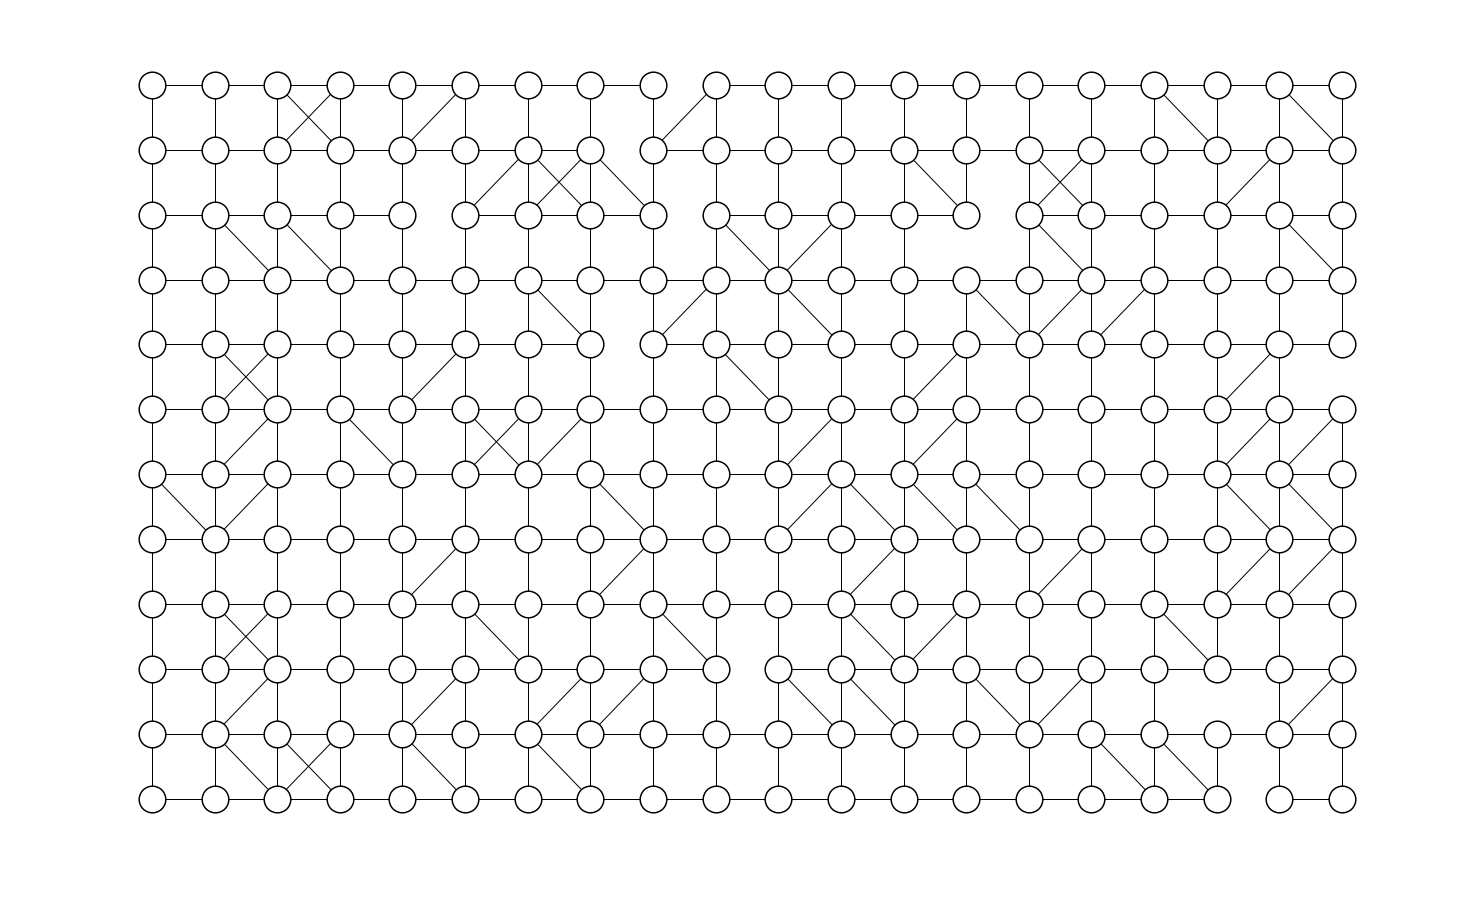

In [38]:
from itertools import product

M = 20;
N = 12
Z = 1.7
NN = M*N

A = np.zeros((NN,NN))
X = np.zeros((NN))
Y = np.zeros((NN))

sig = 0.1;
coords = []
#cols = ("blue","red","yellow","black")
cols = ("black","black")
col = []
for i,j in product(range(N),range(M)):
    ex = np.random.randn(1)*sig
    ey = np.random.randn(1)*sig
    coords.append((j,i))
    X[i*M+j] = i+ex
    Y[i*M+j] = j+ey
    col.append(np.random.choice(cols))
    
    
    
for k,r in product(range(NN),range(NN)):
    if k != r:
        d = (X[k]-X[r])**2 + (Y[k]-Y[r])**2
        A[k,r] = 1 if d < Z else 0

G = nx.Graph(A)

plt.figure(figsize=(M,N))
#nx.draw(G, pos, node_color="white", node_size=500, labels=labels, font_size=10, arrows=True)
nx.draw(G, coords, node_color='black', node_size=200, arrows=False, linewidths=14.)
nx.draw_networkx_nodes(G, coords, node_color='white', node_size=200, arrows=False, linewidths=11., linecolors='black')
#nx.draw_graphviz(G,node_size=500, labels=labels, font_size=24, arrows=True)
plt.show()

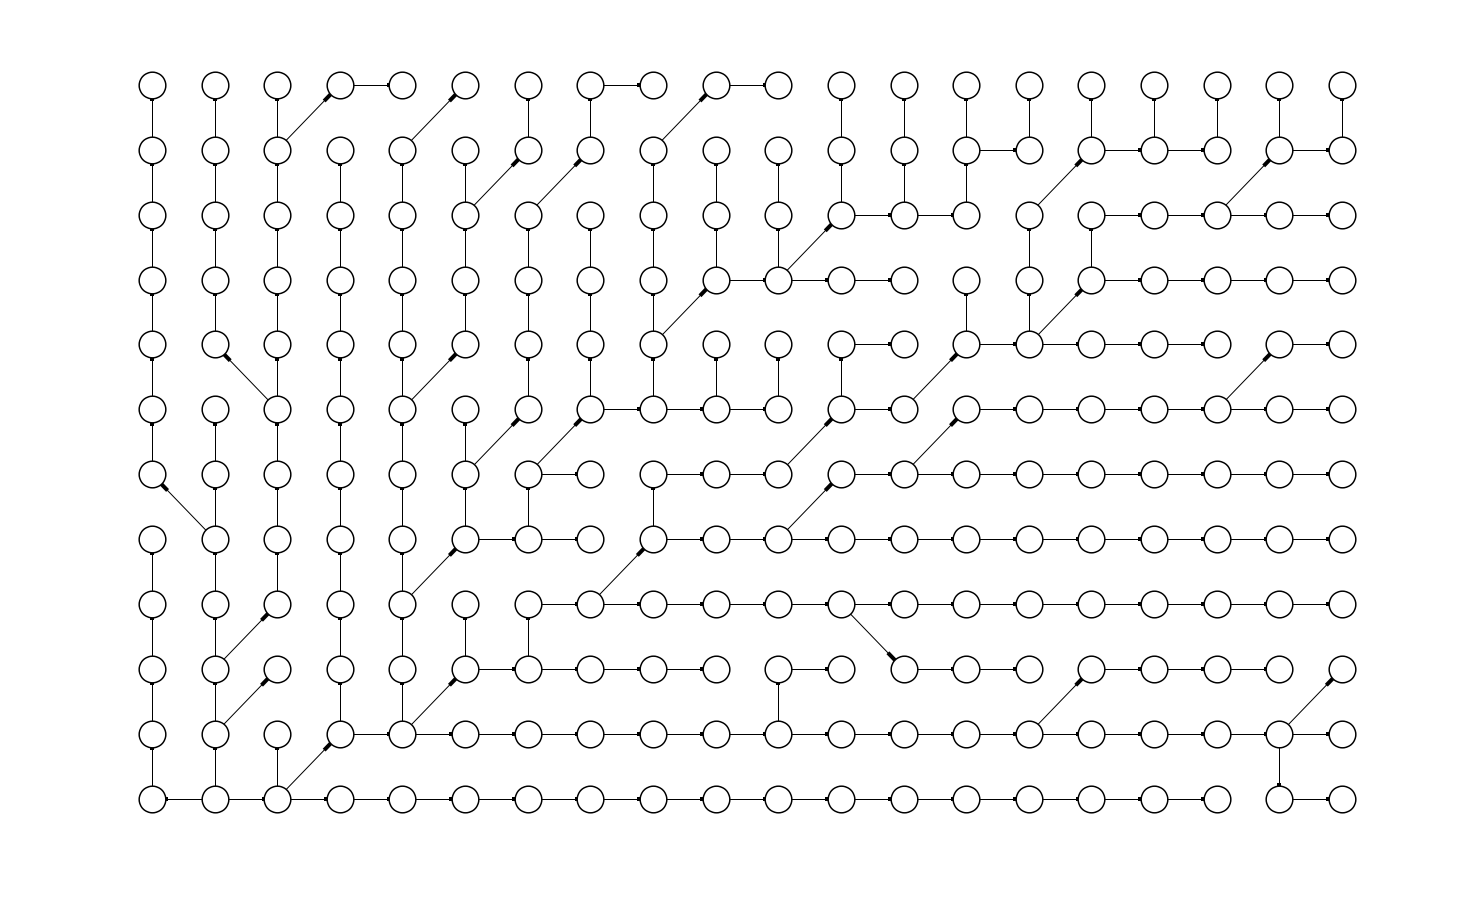

In [39]:
#t = nx.dfs_tree(G,17)
t = nx.bfs_tree(G,1)
#t = nx.prim_mst(G)
plt.figure(figsize=(M,N))
nx.draw(t, coords, node_size=200,node_color="black",linewidths=14.)
nx.draw_networkx_nodes(t, coords, node_color="white", node_size=200,linewidths=11.)

plt.show()



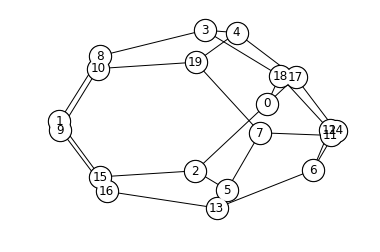

In [40]:
#nx.view_pygraphviz(G)
N = 20
#H = nx.random_graphs.watts_strogatz_graph(N,5,0.1)
H = nx.random_graphs.random_regular_graph(3,N)

lbl = {e:e for e in range(N)}
#nx.view_pygraphviz(H)
nx.draw_networkx_nodes(H,node_color="black",alpha=1, node_size=500, pos=nx.spectral_layout(H))
nx.draw(H,labels=lbl,node_color="white",alpha=1, node_size=400, pos=nx.spectral_layout(H))



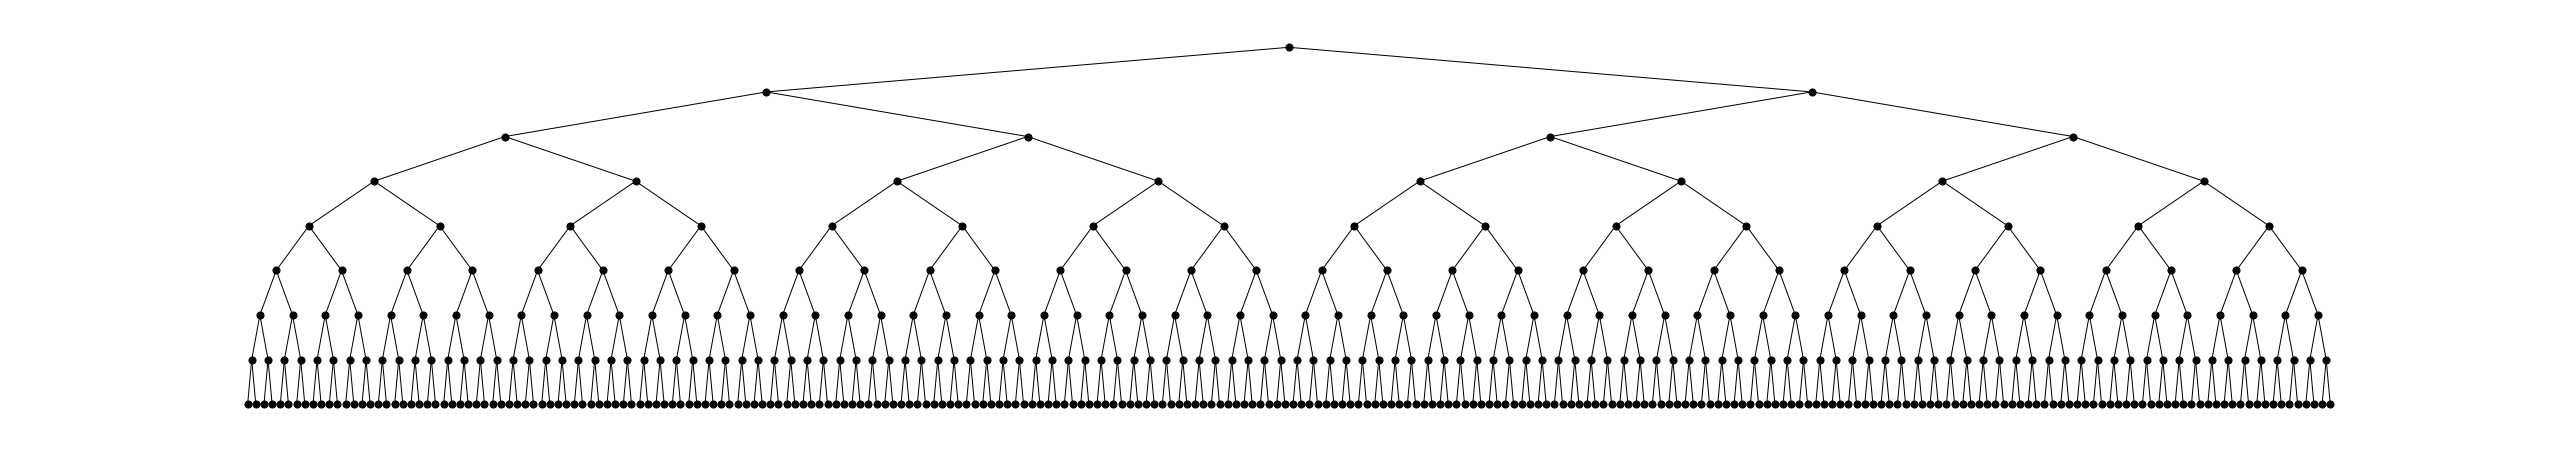

In [6]:
G = nx.Graph()

d = 9
G.add_node(0)
coord = [(0.5,0)]
depth = [0]

for n in range(2,256*2):
    G.add_node(n-1)
    p = int(np.floor(n/2))
    depth.append(depth[p-1]+1)
    if 2*p==n: # left child
        ep = -(1.0/(2**(depth[p-1]+2)))
    else:
        ep = 1.0/(2**(depth[p-1]+2)) 
    coord.append((coord[p-1][0]+ep,-(depth[p-1]+1)))
    G.add_edge(n-1,p-1)

plt.figure(figsize=(35,6))
nx.draw(G, coord, node_size=50, node_color='black')
#nx.draw_shell

[-1  0 49 11 28 26 36 14 29 41 20  1 20 49 48 35 22  0  2 40 36 11 12 13  3
 21 43 16 38  0 45 41 36 36 23  3 28 29 15 18 44 26  4  7 38  5 24 19 18 21]


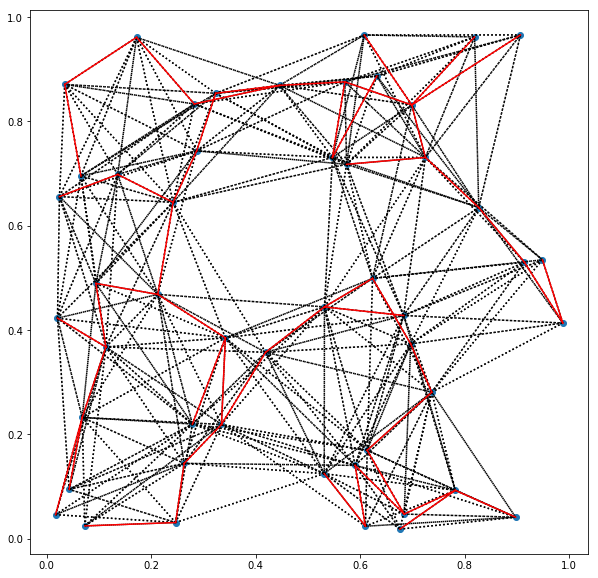

In [7]:
import heapq
import numpy as np

N = 50
thr = 0.35
lb = 0.1
X = np.random.rand(N,2)
D = np.zeros((N,N))

for i,j in product(range(N),range(N)):
    D[i,j] = np.sqrt((X[i,0]-X[j,0])**2 + (X[i,1]-X[j,1])**2)
    if D[i,j]>thr or D[i,j]<lb :
        D[i,j] = np.Inf

visited = np.empty(N,dtype=bool); visited.fill(False)

root = 0
visited[root] = True
numvis = 1;
spt = np.empty(N,dtype=int)
spt.fill(-1)
spt[root] = -1

q = []


for j in range(N):
    if np.isfinite(D[root,j]):
        heapq.heappush(q, (D[root,j], root, j))


while numvis<N:
    if len(q)==0:
        break;
    d,i,j = heapq.heappop(q)
    while len(q)>0 and visited[j]:
        d,i,j = heapq.heappop(q)
        
    spt[j] = i
    visited[j] = True
    numvis+=1
    
    for k in range(N):
        if np.isfinite(D[j,k]) and not visited[k]:
            heapq.heappush(q, (D[j,k], j, k))
    
print(spt)
    
plt.figure(figsize=(10,10))
plt.plot(X[:,0],X[:,1],'o')
for i,j in product(range(N),range(N)):
    if not np.isinf(D[i,j]):
        plt.plot(X[[i,j],0],X[[i,j],1],'k:')
        
for u in range(N):
    if spt[u]!=-1:
        plt.plot(X[[u,spt[u]],0],X[[u,spt[u]],1],'r-')
    


plt.show()


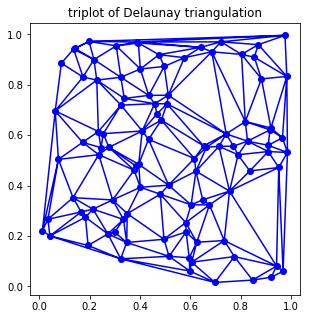

In [3]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import math

min_radius = 0.1
N = 100

x = np.random.rand(N)
y = np.random.rand(N)

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = tri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid*xmid + ymid*ymid < min_radius*min_radius, 1, 0)
triang.set_mask(mask)

# Plot the triangulation.
plt.figure(figsize=(5,5))
plt.gca().set_aspect('equal')
plt.triplot(triang, 'bo-')
plt.title('triplot of Delaunay triangulation')
plt.show()

* Traveling Salesman
* Complete Binary tree
* Spanning Tree
* Bipartite Graph
* Shortest Path Tree

In [1]:
import pygraphviz as pgv
from IPython.display import Image
from IPython.display import display

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']


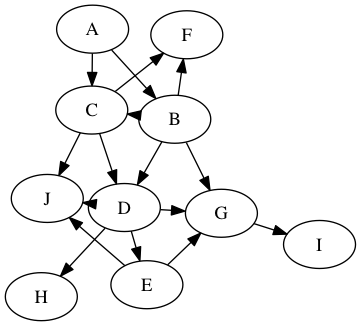

In [9]:
def random_alphabet(N=20, first_letter='A'):
    """Generates unique strings to be used as index_names"""
    if N<27:
        alphabet = [chr(i+ord(first_letter)) for i in range(N)]
    else:
        alphabet = ['X'+str(i) for i in range(N)]    
    return alphabet

def random_parents(alphabet, max_indeg=3):
    """Random DAG generation"""
    N = len(alphabet)
    print(alphabet)
    indeg = lambda: np.random.choice(range(1,max_indeg+1))
    parents = {a:[b for b in np.random.choice(alphabet[0:(1 if i==0 else i)], replace=False, size=min(indeg(),i))] for i,a in enumerate(alphabet)}
    return parents

def show_dag_image(index_names, parents, imstr='_BJN_tempfile.png', prog='dot'):
    name2idx = {name: i for i,name in enumerate(index_names)}
    A = pgv.AGraph(directed=True)
    for i_n in index_names:
        A.add_node(name2idx[i_n], label=i_n)
        for j_n in parents[i_n]:
            A.add_edge(name2idx[j_n], name2idx[i_n])
    A.layout(prog=prog)
    A.draw(imstr)
    display(Image(imstr))
    return 

index_names = random_alphabet(10)
parents = random_parents(index_names, 3)
show_dag_image(index_names, parents, prog='neato')

In [ ]:

# Road Network
# Apt for a grid on 2-D
# Construct a Cartesian product 
# Remove Random junctions to give a more realistic view
# Compute a smooth height z
# Transform x,y and print



In [23]:

def neighbors(Vis, c):
    # returns i and j indices of neighbors 
    
    i = c[0]
    j = c[1]
    
    neighs = []
    
    up_i = i-1
    while (up_i>=0 and not Vis[up_i, j]):
        up_i -= 1
    
    if up_i>=0:
        neighs.append((up_i, j))
        
    down_i = i+1
    while (down_i<Vis.shape[0] and not Vis[down_i, j]):
        down_i += 1
        
    if down_i < Vis.shape[0]:
        neighs.append((down_i, j))
        
    left_j = j-1
    while (left_j>=0 and not Vis[i, left_j]):
        left_j -= 1
    
    if left_j >=0:
        neighs.append((i, left_j))
        
    right_j = j+1
    while (right_j<Vis.shape[1] and not Vis[i, right_j]):
        right_j += 1
        
    if right_j<Vis.shape[1]:
        neighs.append((i, right_j))
    
    return neighs


N = 5
M = 6
pr = 0.3

x = np.random.rand(N)
y = np.random.rand(M)

Vis = np.random.choice([False, True], size=(M, N), p=[pr, 1-pr])

print(Vis)

Graph = {}

for i in range(M):
    for j in range(N):
        if Vis[i,j]:
            Graph[(i,j)] = neighbors(Vis, (i,j))



[[ True  True False  True  True]
 [ True  True  True  True False]
 [ True  True False  True  True]
 [False  True False  True False]
 [False False False False  True]
 [ True  True False  True False]]


In [25]:
Graph.keys()

[(0, 1),
 (1, 2),
 (0, 0),
 (3, 3),
 (3, 1),
 (4, 4),
 (2, 1),
 (2, 4),
 (2, 0),
 (1, 3),
 (2, 3),
 (5, 0),
 (0, 4),
 (1, 0),
 (5, 1),
 (0, 3),
 (1, 1),
 (5, 3)]

In [26]:
G = nx.Graph(A)

plt.figure(figsize=(M,N))
#nx.draw(G, pos, node_color="white", node_size=500, labels=labels, font_size=10, arrows=True)
nx.draw(G, coords, node_color='black', node_size=200, arrows=False, linewidths=14.)
nx.draw_networkx_nodes(G, coords, node_color='white', node_size=200, arrows=False, linewidths=11., linecolors='black')
#nx.draw_graphviz(G,node_size=500, labels=labels, font_size=24, arrows=True)
plt.show()


NameError: name 'nx' is not defined

In [33]:
%connect_info

{
  "stdin_port": 57484, 
  "ip": "127.0.0.1", 
  "control_port": 57485, 
  "hb_port": 57486, 
  "signature_scheme": "hmac-sha256", 
  "key": "062534bd-ecab-4960-b66c-4bdacfd6b692", 
  "shell_port": 57482, 
  "transport": "tcp", 
  "iopub_port": 57483
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing /Users/cemgil/Library/Jupyter/runtime/kernel-28aae665-e995-49c2-a35c-c1740b4d8c4f.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.
